In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
heart_disease = pd.read_csv("../Data/heart-disease.csv")
heart_disease[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
x = heart_disease.drop("target",axis=1)
y = heart_disease["target"]

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8)


In [8]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x_train,y_train)

RandomForestClassifier()

In [12]:
clf.predict(x_test)

array([1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0], dtype=int64)

In [10]:
clf.score(x_test,y_test)

0.8360655737704918

 Thanks to the consistency of Scikit-Learn's API design,
 we can use virtually the same code to fit, score and make predictions with each of our models.


To see which model performs best, we'll do the following:

1) Instantiate each model in a dictionary
2) Create an empty results dictionary
3) Fit each model on the training data
4) Score each model on the test data
5) Check the results

If you're wondering what it means to instantiate each model in a dictionary, see the example below.

In [16]:
# from sklearn.ensemble import Lin

example_dict = {"RandomForestClassifier":RandomForestClassifier()}

example_model ={}
for model_name,model in example_dict.items():
    model.fit(x_train,y_train)
    example_model[model_name] = model.score(x_test,y_test)
    
example_model
    

{'RandomForestClassifier': 0.8524590163934426}

In [22]:
# import the models first
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression



models = {"LinearSVC": LinearSVC(),
          "KNN": KNeighborsClassifier(),
          "SVC": SVC(),
          "LogisticRegression": LogisticRegression(),
          "RandomForestClassifier": RandomForestClassifier()}

results = {}
for model_name,model in models.items():
    model.fit(x_train,y_train)
    results[model_name]= model.score(x_test,y_test)
    
results
    

C:\Users\Riya\Desktop\machine-learning\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Riya\Desktop\machine-learning\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Riya\Desktop\machine-learning\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LinearSVC': 0.8360655737704918,
 'KNN': 0.7377049180327869,
 'SVC': 0.6721311475409836,
 'LogisticRegression': 0.8852459016393442,
 'RandomForestClassifier': 0.8688524590163934}

<Axes: >

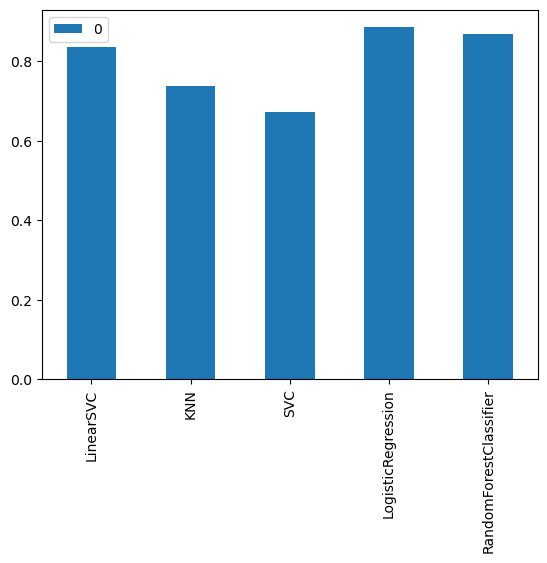

In [24]:
result_df  = pd.DataFrame(results.values(),results.keys())
result_df.plot.bar()

#### Hyperparameter tunning

In [29]:
from sklearn.model_selection import RandomizedSearchCV

grid = {"n_estimators":[10,100,200,500,1000,1200],
       "max_depth":[None,5,10,20,30],
       "max_features":["auto","sqrt"],
       "min_samples_split":[2,4,6],
       "min_samples_leaf":[1,2,4]}

clf = RandomForestClassifier()

rs_clf = RandomizedSearchCV(estimator=clf,
                           param_distributions=grid,
                           n_iter=10,
                           cv=5,
                           verbose=2)

rs_clf.fit(x_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=4, n_estimators=100; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; total time=   0.0s
[CV] END max_depth=5, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1200; tot

C:\Users\Riya\Desktop\machine-learning\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
30 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Riya\Desktop\machine-learning\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Riya\Desktop\machine-learning\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Riya\Desktop\machine-learning\env\lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_pa

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [30]:
rs_clf.best_params_


{'n_estimators': 100,
 'min_samples_split': 6,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 30}

In [31]:
rs_clf.score(x_test,y_test)

0.8360655737704918

In [32]:
# importing and exporting trained model

from joblib import dump , load

dump(rs_clf,"save-assignment-model.joblib")



['save-assignment-model.joblib']

In [33]:
model = load(filename="save-assignment-model.joblib")

In [34]:
model

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000, 1200]},
                   verbose=2)

In [35]:
model.score(x_test,y_test)

0.8360655737704918